In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib.font_manager as fm

plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns=25

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### The Play
This play is from the Golden State Warriors - Memphis Grizzlies game on November 2, 2015. The Warriors wound up winning by 50 points, and the third quarter was a showcase of Steph Curry's talents.  In this play from the 3rd quarter, The Grizzlies' (Red) Mike Conley (11) dribbles baseline and kicks out to Matt Barnes (22) behind the 3-point arc who chucks up a brick that gets rebounded by Steph Curry (30). He begins to lead the offensive attack, and quickly three other Warriors are even with him at half court leading to a 4 on 3 break. Curry stops at the 3-point arc, drawing two defenders. From his left hand, he takes the ball behind his back, and the two defenders are convinced he's passing to Andre Igudala (9), but Curry brings the ball to his right hand and threads a pass between defenders to a cutting James Michael McAdoo (20) for the dunk. Watch the play below, or on nba.com [here](http://stats.nba.com/cvp.html?GameID=0021500051&GameEventID=383)

In [2]:
IFrame('http://stats.nba.com/cvp.html?GameID=0021500051&GameEventID=383',width=900,height=400)

In [3]:
IFrame('http://stats.nba.com/movement/#!/?GameID=0021500051&GameEventID=383',width=700,height=400)

In [4]:
url = 'http://stats.nba.com/stats/locations_getmoments/?eventid=383&gameid=0021500051'
response = requests.get(url)
response.json().keys()

[u'moments', u'visitor', u'gamedate', u'gameid', u'home']

# tracking data
Our keys returned are:
* moments 
* visitor
* home 
* gamedate
* gameid

Let's move home, visitor, and moments to their own variables. Then print out gamedate and gameid to see if there is anything else they contain.

In [5]:
home = response.json()["home"]
visitor = response.json()["visitor"]
moments = response.json()["moments"]
print response.json()["gamedate"]
print response.json()["gameid"]

2015-11-02
0021500051


## gamedate & gameid
Nothing of interest in gamedate and gameid (we already know this information just to look up the data).

Let's examine home data

In [6]:
home

{u'abbreviation': u'GSW',
 u'name': u'Golden State Warriors',
 u'players': [{u'firstname': u'Leandro',
   u'jersey': u'19',
   u'lastname': u'Barbosa',
   u'playerid': 2571,
   u'position': u'G'},
  {u'firstname': u'Shaun',
   u'jersey': u'34',
   u'lastname': u'Livingston',
   u'playerid': 2733,
   u'position': u'G'},
  {u'firstname': u'Andre',
   u'jersey': u'9',
   u'lastname': u'Iguodala',
   u'playerid': 2738,
   u'position': u'G-F'},
  {u'firstname': u'Jason',
   u'jersey': u'1',
   u'lastname': u'Thompson',
   u'playerid': 201574,
   u'position': u'F-C'},
  {u'firstname': u'Brandon',
   u'jersey': u'4',
   u'lastname': u'Rush',
   u'playerid': 201575,
   u'position': u'G-F'},
  {u'firstname': u'Marreese',
   u'jersey': u'5',
   u'lastname': u'Speights',
   u'playerid': 201578,
   u'position': u'F-C'},
  {u'firstname': u'Stephen',
   u'jersey': u'30',
   u'lastname': u'Curry',
   u'playerid': 201939,
   u'position': u'G'},
  {u'firstname': u'Klay',
   u'jersey': u'11',
   u'lastn

## home/visitor data
visitor/home - contains all information about visiting/home team
* teamid - teamid from the API
* name
* abbreviation
* players
  * playerid - playerid from the API
  * firstname
  * lastname
  * jersey - jersey number
  * position - position the player plays (C,F,G,G-F,F-C)

In [7]:
len(moments)

251

In [8]:
moments[0]

[3,
 1446527673002,
 132.22,
 7.09,
 None,
 [[-1, -1, 14.64474, 44.48211, 2.25707],
  [1610612744, 2738, 18.86386, 23.97772, 0.0],
  [1610612744, 201939, 18.87993, 41.50729, 0.0],
  [1610612744, 202691, 5.05095, 29.13419, 0.0],
  [1610612744, 203110, 12.88533, 34.84216, 0.0],
  [1610612744, 203949, 8.88615, 20.38291, 0.0],
  [1610612763, 2440, 27.47547, 8.76582, 0.0],
  [1610612763, 201145, 9.42341, 11.88861, 0.0],
  [1610612763, 201584, 4.219, 16.40298, 0.0],
  [1610612763, 201144, 16.38252, 44.27504, 0.0],
  [1610612763, 201188, 19.68304, 35.52727, 0.0]]]

## moments

moments - contain tracking data. `len(moments)` is number of moments in the eventid (here, 251), usually .04 seconds apart. So for this data, I have about 10.04 seconds. __Note:__ this data can and did change from day to day. Previously, there were 275 moments, or 11 seconds.

a single element in moments contains times and positions of all players and ball. Let's examine the output above:
* the __first__ element `moments[0][0]` is `3`, the __quarter__.
* the __second__ element `moments[0][1]` is `1446527673002`, the __unix timestamp__.
* the __third__ element `moments[0][2]` is `132.22`, and decreases as moments increase. it is the __seconds left in the quarter__
* the __fourth__ element `moments[0][3]` is `7.09`, and decreases as moments increase, then reset to 24. it is __seconds left in the shot clock__
* the __fifth__ element `moments[0][4]` is `None`, and is that value for all elements in moments. I'm not sure what this value is __?__
* the __sixth__ element `moments[0][5]` is a list of lists indicating __teamid, playerid, x, y, z__

To reiterate, the first 5 elements:

In [9]:
moments[0][0:5]

[3, 1446527673002, 132.22, 7.09, None]

`[quarter, unixtime, timeleftgame, timeleftshot, unknown]`
are the labels.

Let's look at the ball (element 0):

In [10]:
moments[0][5][0]

[-1, -1, 14.64474, 44.48211, 2.25707]

`[teamid, playerid, x, y, z]`

the ball has a `teamid=-1` and `playerid=-1`, and appears to be the only tracked element with a z value.

Some have speculated that the z coordinate is the radius of the ball, but let's look at a histogram of values:

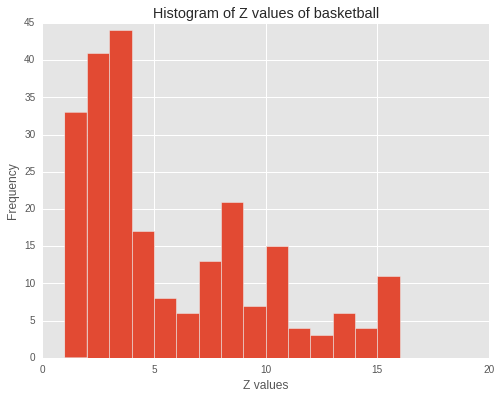

In [30]:
ball_zdat = []
for m in moments:
    ball_zdat.append(m[5][0][4])
fig = plt.figure(figsize=(8, 6))
plt.hist(ball_zdat,bins=range(1,20))
plt.title('Histogram of Z values of basketball')
plt.xlabel('Z values')
plt.ylabel('Frequency')
plt.show()

Looking at the histogram, it is likely that the z value is the height, in feet, of the basketball from the floor. The most common values are approximately waist height and below. A few values above the height of the rim (10ft.) would indicate a shot or lob pass. For the ball, let's plot the x,y,and color it by z.

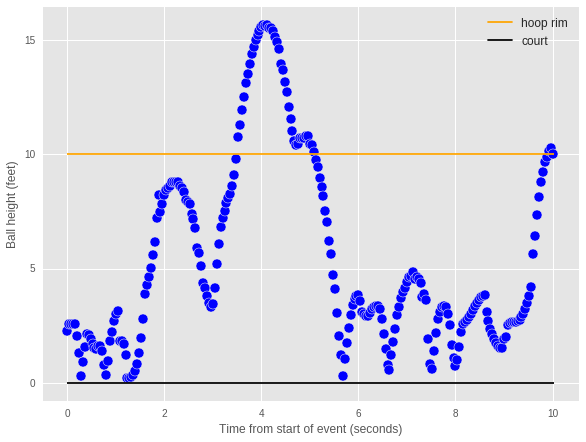

In [53]:
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(8, 6))
#scat = plt.scatter(y=ball_zdat,x=np.arange(0,len(ball_zdat))*.04,c=ball_zdat,cmap=plt.cm.RdBu,s=100)
scat = plt.scatter(y=ball_zdat,x=np.arange(0,len(ball_zdat))*.04,s=100)

court = plt.hlines(0,0,len(ball_zdat)*.04,colors='k')
hoop = plt.hlines(10,0,len(ball_zdat)*.04,colors='orange')
plt.autoscale(tight=True)
plt.tight_layout()
plt.ylabel('Ball height (feet)')
plt.xlabel('Time from start of event (seconds)')
plt.legend((hoop,court),('hoop rim', 'court'),fontsize=12)
#cbar = fig.colorbar(scat,orientation='vertical',fraction=0.05)
plt.show()

We can see some of the action in the plot above.
* The dribble drive begins it
* A lob around 1.75 seconds
* A shot around 3 seconds
* The shot bouncing off the rim at 4.5 seconds
* A few dribbles
* A pass and shot from 9 seconds on

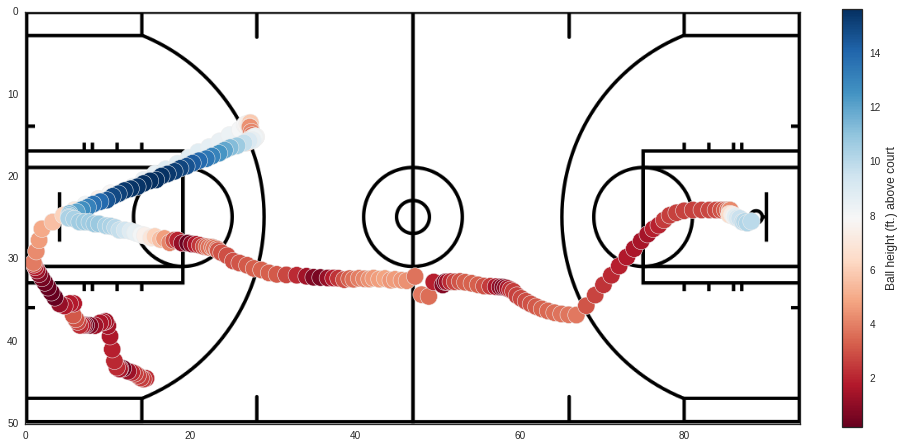

In [12]:
ball_xdat = []
ball_ydat = []
for m in moments:
    ball_xdat.append(m[5][0][2])
    ball_ydat.append(m[5][0][3])

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15, 11.5))

scat = plt.scatter(x=ball_xdat,y=ball_ydat,c=ball_zdat,
    cmap=plt.cm.RdBu, s=300, zorder=1)
plt.style.use('grayscale')
court = plt.imread("img/fullcourt.png")
img = plt.imshow(court, zorder=0, extent=[0,94,50,0])
plt.style.use('seaborn-white')
cbar = fig.colorbar(scat,orientation='vertical',fraction=0.025)
cbar.ax.invert_xaxis()
cbar.ax.set_ylabel('Ball height (ft.) above court')
# xaxis is 0-94 ft. yaxis 50-0 feet (inverted)
import matplotlib.font_manager as fm
# zorder should be less than zorder of scatter, so court is drawn first.
annotation_font = fm.FontProperties(family='Bitstream Vera Sans',style='normal',size=10,weight='normal',stretch='normal')
scat.annotate('[START] Connelly drives baseline',
              xy = ball_xdat

#
#plt.imshow(court, zorder=0, extent=[0,94,50,0])

#plt.xlim(0,94)
plt.show()

In [17]:
unknown_field=[]
for m in moments:
    unknown_field.append(m[4])
print unknown_field

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [15]:
% load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
court[10][20]
plt.style.use('grayscale')
plt.imshow(court, extent=[0,94,50,0])

In [ ]:
print(plt.style.available)

## home/visitor
* visitor/home - contains all information about visiting/home team
 * teamid
 * name
 * abbreviation
 * players
   * playerid
   * firstname
   * lastname
   * jersey
   * position

In [ ]:
[m[0:5] for m in moments]